In [3]:
# install pycaret
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [4]:
# import pycaret
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
# install dataset
from pycaret.datasets import get_data
data = get_data('energy')

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
from pycaret.regression import *
s = setup(data, target = 'Heating Load', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Heating Load
2,Target type,Regression
3,Original data shape,"(768, 10)"
4,Transformed data shape,"(768, 10)"
5,Transformed train set shape,"(537, 10)"
6,Transformed test set shape,"(231, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [7]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [8]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [9]:
exp.setup(data, target = 'Heating Load', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Heating Load
2,Target type,Regression
3,Original data shape,"(768, 10)"
4,Transformed data shape,"(768, 10)"
5,Transformed train set shape,"(537, 10)"
6,Transformed test set shape,"(231, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [10]:
# compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2666,0.1944,0.4191,0.9981,0.0204,0.0126,0.2140
catboost,CatBoost Regressor,0.3247,0.2433,0.4858,0.9976,0.0226,0.0153,1.0330
xgboost,Extreme Gradient Boosting,0.4593,0.8255,0.8448,0.9920,0.0365,0.0217,0.0800
lightgbm,Light Gradient Boosting Machine,0.5472,0.8907,0.9298,0.9910,0.0425,0.0266,0.4220
rf,Random Forest Regressor,0.4854,0.9226,0.9017,0.9909,0.0376,0.0218,0.5000
dt,Decision Tree Regressor,0.4562,1.0199,0.9289,0.9902,0.0429,0.0220,0.0220
gbr,Gradient Boosting Regressor,0.6613,1.0158,0.9894,0.9899,0.0417,0.0301,0.0980
ada,AdaBoost Regressor,1.3288,2.8276,1.6701,0.9719,0.0756,0.0655,0.1310
lr,Linear Regression,1.2868,3.4255,1.8320,0.9659,0.0718,0.0577,0.6560
br,Bayesian Ridge,1.2928,3.4373,1.8360,0.9658,0.0718,0.0579,0.0450


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [11]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3791,0.3548,0.5957,0.9967,0.0259,0.0177
1,0.3387,0.3163,0.5624,0.9968,0.0219,0.0150
2,0.3076,0.2095,0.4578,0.9979,0.0178,0.0140
3,0.3297,0.1808,0.4252,0.9983,0.0218,0.0165
4,0.3665,0.3037,0.5511,0.9973,0.0259,0.0168
5,0.2561,0.1108,0.3328,0.9987,0.0166,0.0141
6,0.3563,0.2521,0.5021,0.9974,0.0243,0.0168
7,0.3043,0.2644,0.5142,0.9969,0.0187,0.0132
8,0.3451,0.3128,0.5593,0.9967,0.0335,0.0158


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

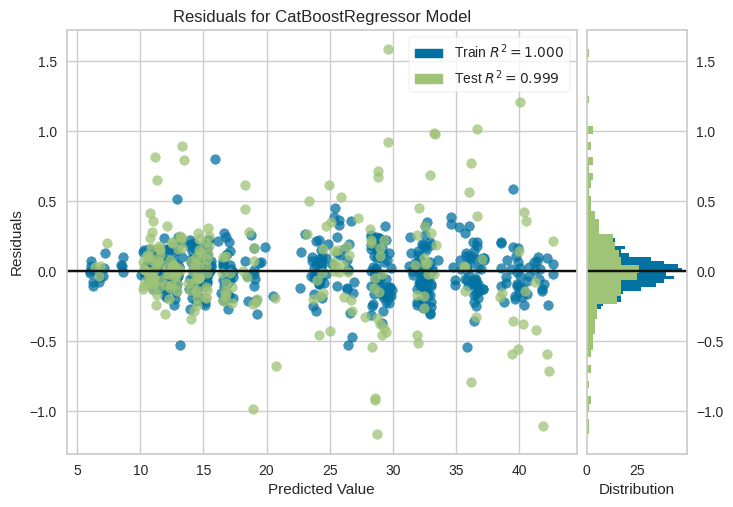

In [12]:
# plot residuals
plot_model(best, plot = 'residuals')

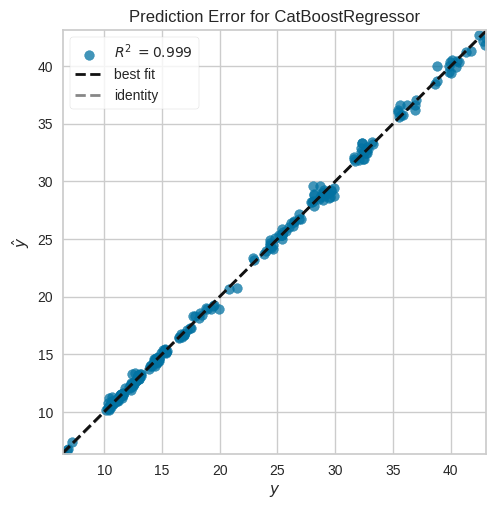

In [13]:
# plot error
plot_model(best, plot = 'error')

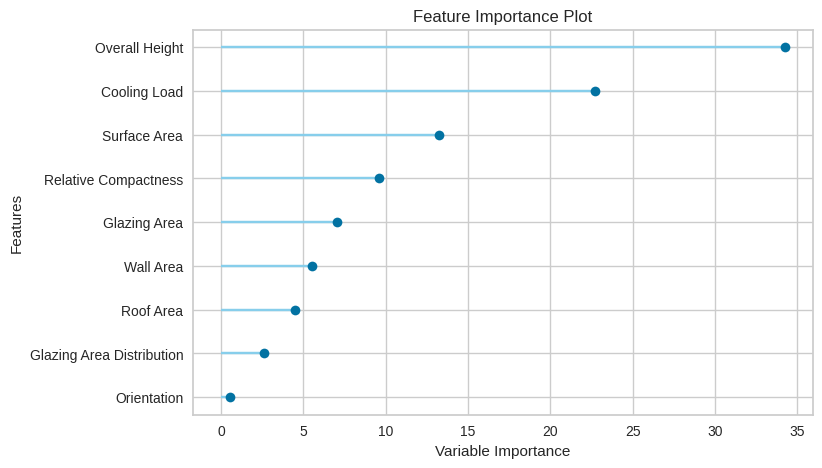

In [14]:
# plot feature
plot_model(best, plot = 'feature')

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2436,0.1293,0.3596,0.9986,0.0156,0.0117


In [17]:
# show predictions df
holdout_pred.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load,Heating Load,prediction_label
236,0.62,808.5,367.5,220.50,3.5,2,0.10,4,14.370000,12.850000,12.814086
395,0.86,588.0,294.0,147.00,7.0,5,0.25,3,29.820000,29.070000,29.293093
36,0.66,759.5,318.5,220.50,3.5,2,0.00,0,12.400000,7.180000,7.380499
210,0.79,637.0,343.0,147.00,7.0,4,0.10,4,41.860001,35.450001,36.222744
483,0.98,514.5,294.0,110.25,7.0,5,0.25,5,30.200001,28.610001,28.492035


In [18]:
# copy data and drop Heating Load
new_data = data.copy()
new_data.drop('Heating Load', axis=1, inplace=True)
new_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [19]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load,prediction_label
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.330000,15.551953
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.330000,15.623201
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.330000,15.581966
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.330000,15.592941
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.280001,20.646112


In [20]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Relative Compactness',
                                              'Surface Area', 'Wall Area',
                                              'Roof Area', 'Overall Height',
                                              'Orientation', 'Glazing Area',
                                              'Glazing Area Distribution',
                                              'Cooling Load'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7fed22e6f730>)]),
 'my_fi

In [23]:
l=load_model('my_first_pipeline')
l

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Relative Compactness',
                                             'Surface Area', 'Wall Area',
                                             'Roof Area', 'Overall Height',
                                             'Orientation', 'Glazing Area',
                                             'Glazing Area Distribution',
                                             'Cooling Load'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7fed22e09de0>)])